In [1]:
import pandas as pd
import os
import sys
#Enables imports from src directory in notebooks
sys.path.insert(0, os.path.abspath('../src'))
#Auto update imports when python files in src is updated
%load_ext autoreload
%autoreload 2


In [2]:
data_location = "E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data"

dataset_df = pd.read_csv(os.path.join(data_location, '../dataset_filtered-and-normalized.csv'))

#print(list(dataset_df.keys()))

In [3]:
dataset_df = dataset_df.filter(regex=("mean_temp.*"))
dataset_df.head()

,mean_temp0,mean_temp1,mean_temp2,mean_temp3,mean_temp4,mean_temp5,mean_temp6,mean_temp7,mean_temp8,mean_temp9,...,mean_temp173,mean_temp174,mean_temp175,mean_temp176,mean_temp177,mean_temp178,mean_temp179,mean_temp180,mean_temp181,mean_temp182
0,0.631667,0.668333,0.646667,0.630000,0.611667,0.613333,0.606667,0.641667,0.685000,0.618333,...,0.726667,0.751667,0.708333,0.781667,0.778333,0.785000,0.773333,0.766667,0.755000,0.755000
1,0.490000,0.491667,0.520000,0.563333,0.531667,0.561667,0.565000,0.571667,0.563333,0.600000,...,0.573333,0.588333,0.563333,0.610000,0.670000,0.655000,0.611667,0.595000,0.636667,0.631667
2,0.530000,0.546667,0.561667,0.568333,0.610000,0.558333,0.560000,0.531667,0.505000,0.478333,...,0.708333,0.661667,0.635000,0.616667,0.651667,0.653333,0.708333,0.721667,0.635000,0.553333
3,0.590000,0.596667,0.573333,0.590000,0.620000,0.600000,0.666667,0.618333,0.613333,0.641667,...,0.675000,0.705000,0.710000,0.731667,0.735000,0.730000,0.733333,0.731667,0.711667,0.713333
4,0.515000,0.505000,0.511667,0.546667,0.558333,0.570000,0.560000,0.575000,0.571667,0.576667,...,0.730000,0.718333,0.710000,0.678333,0.686667,0.745000,0.703333,0.673333,0.691667,0.710000


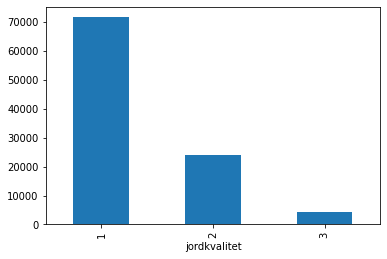

In [4]:
from utils import plot_bar
soilqdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality.csv'), nrows=100000)
soilqrdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality_refined.csv'))

plot_bar(soilqdf, 'jordkvalitet')


In [5]:
from read_sat_images import read_images
sat_images = read_images('sentinel_100x100_1.h5', 10)


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


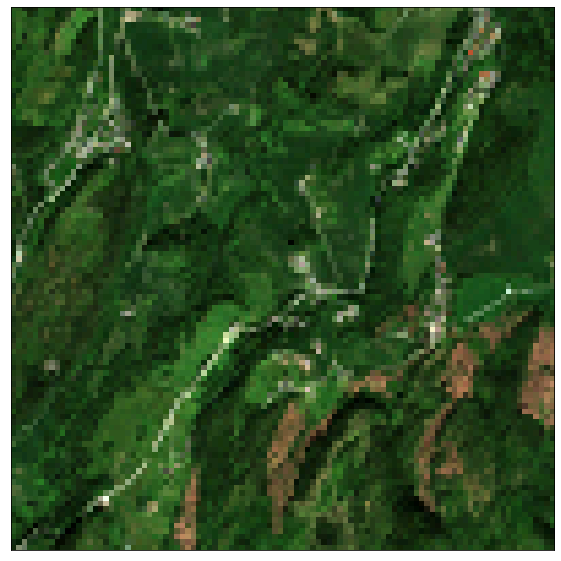

In [6]:
from utils import to_rgb, plot_image, normalize_img
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

test_orgnr = '811555762'


#print(list(sat_images.keys()))
org = sat_images[test_orgnr]
#print(list(org.keys()))
images = org['2018']
#print(images.shape)
img = images[18]
img = to_rgb(img, normalize=True)
plot_image(img)



plt.imsave(test_orgnr + '.png', img)
# w = h = 15
# fig = plt.figure(figsize=(15, 15))
# columns = 5
# rows = 6
# for i in range(0, columns*rows):
#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(rows, columns, i + 1)
#     plt.imshow(to_rgb(images[i]))
# plt.show()


In [7]:
import h5py
from tqdm import tqdm

sat1_dict = {}
sat0_dict = {}
with h5py.File(os.path.join('E:/MasterThesisData/Satellite_Images', 'sentinel_100x100_1.h5'), "r") as f:
        images = f['images']
        org_number_sat1 = list(images.keys())
        for orgnr in tqdm(org_number_sat1):
                sat1_dict[orgnr] = len(images[orgnr].keys())
with h5py.File(os.path.join('E:/MasterThesisData/Satellite_Images', 'sentinel_100x100_0.h5'), "r") as f:
        images = f['images']
        org_number_sat0 = list(images.keys())
        for orgnr in tqdm(org_number_sat0):
                sat0_dict[orgnr] = len(images[orgnr].keys())

print(len(org_number_sat1))
print(len(org_number_sat0))

in_first = set(org_number_sat1)
in_second = set(org_number_sat0)

in_second_but_not_in_first = in_second - in_first

result = org_number_sat1 + list(in_second_but_not_in_first)
print(len(set(result)))
        


100%|██████████| 4135/4135 [00:31<00:00, 129.51it/s]

3477
4135
7132


In [8]:
matrikkel = pd.read_csv(os.path.join(data_location, 'farm-information/farmer_elevation.csv'), delimiter=',')
columns_to_keep = ['orgnr', 'lat', 'lng']
matrikkel = matrikkel.filter(columns_to_keep)
matrikkel['orgnr'] = matrikkel['orgnr'].astype(str)
matrikkel['lat'] = matrikkel['lat'].astype(float)
matrikkel['lng'] = matrikkel['lng'].astype(float)
print(matrikkel.shape)
matrikkel.head()


(13210, 3)


,orgnr,lat,lng
0,815473132,63.759972,11.514108
1,816181682,60.922778,10.903027
2,816489172,59.590970,11.221282
3,816567742,59.862738,9.817893
4,816936292,59.121218,10.115629


In [9]:
from utils import boundingBox

row = matrikkel.loc[matrikkel['orgnr'] == test_orgnr].iloc[0]
print(row)
bounding_box = boundingBox(row['lat'], row['lng'], 1)
print(bounding_box)



orgnr    811555762
lat        63.2633
lng      10.204632
Name: 7144, dtype: object
(10.18461115947559, 63.25429280117685, 10.22465284052441, 63.27230719882316)


In [10]:
from osgeo import gdal
from osgeo import osr
import rasterio

dataset = rasterio.open(test_orgnr + '.png', 'r')
bands = [1, 2, 3]
data = dataset.read(bands)
transform = rasterio.transform.from_bounds(bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3], data.shape[1], data.shape[2])
crs = {'init': 'epsg:4326'}

with rasterio.open(test_orgnr + '.tif', 'w', driver='GTiff',
                   width=data.shape[1], height=data.shape[2],
                   count=3, dtype=data.dtype, nodata=0,
                   transform=transform, crs=crs) as dst:
    dst.write(data, indexes=bands)

c:\Users\Sigurd\PycharmProjects\kornmo-master-thesis\venv\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [11]:
import geopandas as gpd

soilquality_path = "E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data/soil-data"

soilquality = gpd.read_file(os.path.join(soilquality_path, 'soil-quality.gdb'), driver='FileGDB', layer=0)
soilquality = soilquality.dropna()
soilquality.head()

,objtype,jordkvalitet,kartleggingsmetode,kartleggingsetappe,verifiseringsdato,malemetode,noyaktighet,originaldatavert,områdeid,kopidato,navnerom,fylkeid,komid,lokalid,geometry
0,Jordsmonn,1,D,H94,19950804,22,0,NIBIO,3031,20200707,NO_NIBIO_JORDKVALITET_2020_1,30,3031,1,"MULTIPOLYGON (((271719.981 6664061.226, 271721..."
1,Jordsmonn,1,D,H94,19950804,22,0,NIBIO,3031,20200707,NO_NIBIO_JORDKVALITET_2020_1,30,3031,2,"MULTIPOLYGON (((271485.418 6664127.452, 271483..."
2,Jordsmonn,1,D,H94,19950804,22,0,NIBIO,3031,20200707,NO_NIBIO_JORDKVALITET_2020_1,30,3031,3,"MULTIPOLYGON (((271719.981 6664061.226, 271708..."
3,Jordsmonn,1,D,H94,19950804,22,0,NIBIO,3031,20200707,NO_NIBIO_JORDKVALITET_2020_1,30,3031,4,"MULTIPOLYGON (((271304.653 6664091.251, 271314..."
4,Jordsmonn,1,D,H94,19950804,22,0,NIBIO,3031,20200707,NO_NIBIO_JORDKVALITET_2020_1,30,3031,5,"MULTIPOLYGON (((271289.811 6664054.124, 271293..."


POLYGON ((10.22465284052441 63.25429280117685, 10.22465284052441 63.27230719882316, 10.18461115947559 63.27230719882316, 10.18461115947559 63.25429280117685, 10.22465284052441 63.25429280117685))
True


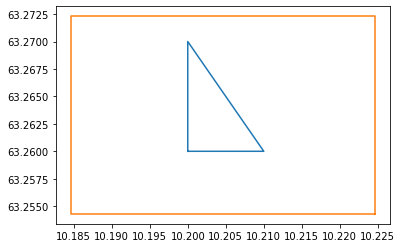

In [12]:
from shapely.geometry import box, mapping, Polygon
import matplotlib.pyplot as plt


polygons = soilquality['geometry']
polygon = Polygon(list(mapping(polygons.iloc[0])['coordinates'][0][0]))
box = box(bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3])
print(box)
polygon2 = Polygon([(10.20, 63.26), (10.21, 63.26), (10.20, 63.27)])
print(box.intersects(polygon2))

plt.plot(*polygon2.exterior.xy)
plt.plot(*box.exterior.xy)


In [13]:
import geopandas as gpd
from shapely import wkt

df = pd.read_csv(os.path.join(data_location, 'soil-data/jordsmonn_geometry.csv'), nrows=1000, dtype=str)
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
print(type(gdf.iloc[0]['geometry']))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [14]:
from read_sat_images import get_images_by_orgnr

images = get_images_by_orgnr('969482789')

print(images)

{'2017': array([[[[112, 105, 101, ..., 123,  81,  74],
         [110, 106, 101, ..., 121,  81,  73],
         [110, 105, 101, ..., 121,  80,  71],
         ...,
         [101,  88,  84, ..., 100,  57,  46],
         [101,  92,  85, ..., 100,  60,  48],
         [111,  96,  89, ..., 108,  63,  49]],

        [[111, 104,  99, ..., 123,  79,  72],
         [111, 104, 100, ..., 121,  80,  72],
         [111, 104, 101, ..., 121,  80,  71],
         ...,
         [101,  97,  88, ..., 100,  59,  46],
         [101, 102,  91, ..., 100,  62,  49],
         [111, 112,  98, ..., 108,  67,  51]],

        [[111, 101,  99, ..., 123,  78,  71],
         [111, 100,  99, ..., 121,  79,  71],
         [111, 103,  99, ..., 121,  79,  71],
         ...,
         [123, 107,  96, ..., 116,  66,  49],
         [123, 112, 101, ..., 116,  69,  53],
         [132, 124, 112, ..., 125,  76,  58]],

        ...,

        [[ 96,  80,  78, ..., 103,  54,  50],
         [ 96,  78,  75, ..., 103,  57,  53],
         